In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np

In [6]:
(Xtrain,ytrain),(Xtest,ytest)=keras.datasets.mnist.load_data()

In [7]:
print(len(ytrain))
ytrain            #### Labels

60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

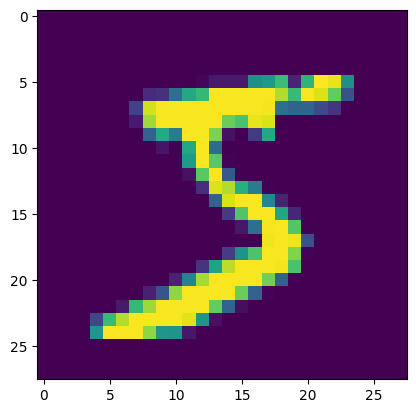

In [8]:
import matplotlib.pyplot as plt
plt.imshow(Xtrain[0])

In [9]:
Xtrain=Xtrain/255
Xtest=Xtest/255


In [25]:
Xtrain[0]  ## Image 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [50]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) ## No need to tell no. of inputs because, it will be automatically taken from flatten layer
# model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])  ## Here We used sparse_categorical_crossentropy as loss function instead of categorical_crossentropy 
                                # beacuase we had to do one hot encoding if we use categorical_crossentropy while in others case we need do it.
                  

In [53]:
hist=model.fit(Xtrain,ytrain,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9172 - loss: 0.2890 - val_accuracy: 0.9541 - val_loss: 0.1606
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9628 - loss: 0.1282 - val_accuracy: 0.9648 - val_loss: 0.1189
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9740 - loss: 0.0887 - val_accuracy: 0.9704 - val_loss: 0.0993
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9804 - loss: 0.0648 - val_accuracy: 0.9707 - val_loss: 0.0935
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9710 - val_loss: 0.1015
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9882 - loss: 0.0388 - val_accuracy: 0.9718 - val_loss: 0.0987
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9737 - val_loss: 0.0924
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9929 - loss: 0.0243

In [54]:
y_prob=model.predict(Xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [55]:
y_pred=y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [56]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(ytest,y_pred)
acc

0.975

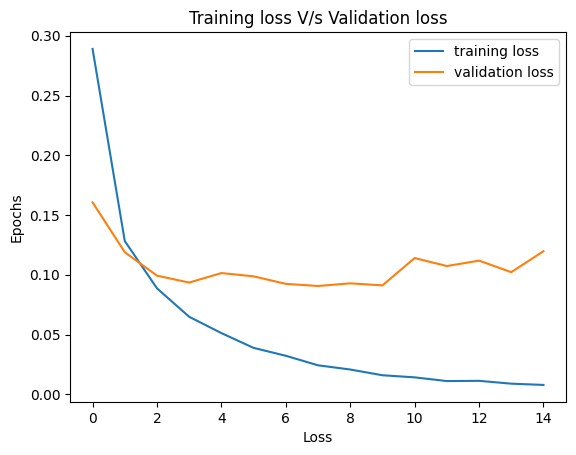

In [62]:
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.legend()
plt.title("Training loss V/s Validation loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.savefig("Loss_plot.jpg")

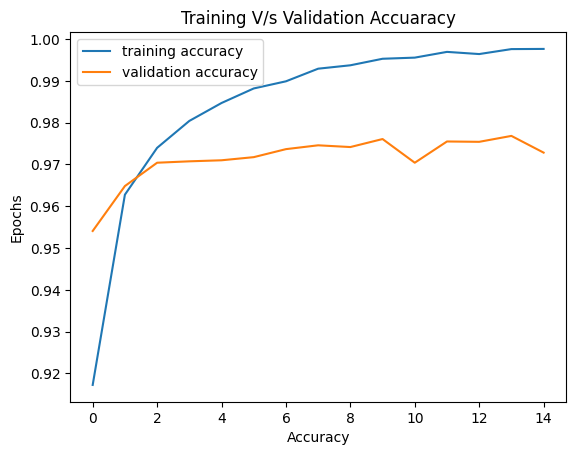

In [63]:
plt.plot(hist.history['accuracy'],label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.title("Training V/s Validation Accuaracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.savefig("accuracy_plot.jpg")

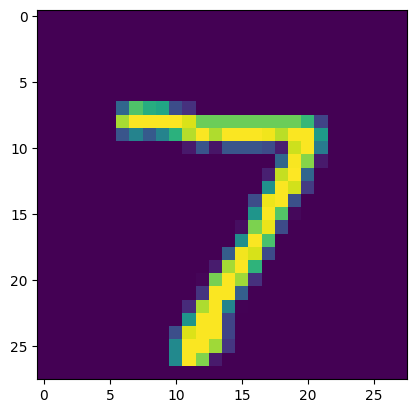

In [64]:
### Example 1
plt.imshow(Xtest[0])

In [65]:
## Prediction: 
model.predict(Xtest[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


array([7])

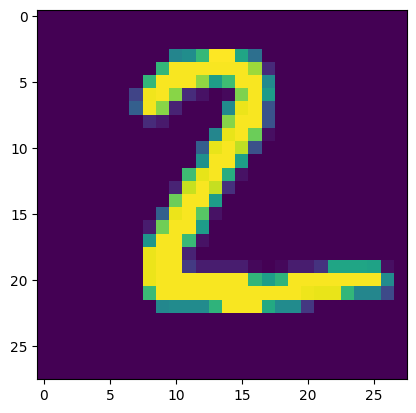

In [72]:
plt.imshow(Xtest[1])

In [73]:
print("Prediction is:")
model.predict(Xtest[1].reshape(1,28,28)).argmax(axis=1)

Prediction is:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([2])